In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh, fmm

In [2]:
particle_numbers = np.logspace(1, 6, 20, dtype=int)

terms = 6
theta = 0.5

max_time = 30

In [3]:
pair_times = []
bh_times = []
fmm_times = []

pair_done, bh_done, fmm_done = False, False, False

for num_particles in particle_numbers:
    print(f'Particles: {num_particles}')
    particles = [general.Particle() for _ in range(num_particles)]

    pair_method = general.Pairwise(particles)
    bh_method = bh.BH(particles, theta, terms)
    fmm_method = fmm.FMM(particles, terms)
    
    if not pair_done:
        print('Pair: ', end='')
        time = %timeit -o pair_method.do_method()
        pair_times.append(time)
        if time.average > max_time:
            pair_done = True
    
    if not bh_done:
        print('BH:   ', end='')
        time = %timeit -o bh_method.do_method()
        bh_times.append(time)
        if time.average > max_time:
            bh_done = True
    
    if not fmm_done:
        print('FMM:  ', end='')
        time = %timeit -o fmm_method.do_method()
        fmm_times.append(time)
        if time.average > max_time:
            fmm_done = True

Particles: 10
Pair: 119 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
BH:   862 µs ± 4.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
FMM:  424 µs ± 288 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Particles: 18
Pair: 387 µs ± 812 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
BH:   2.54 ms ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  3.5 ms ± 7.52 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Particles: 33
Pair: 1.32 ms ± 9.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
BH:   6.27 ms ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  4.33 ms ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Particles: 61
Pair: 4.54 ms ± 5.37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
BH:   16 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  6.58 ms ± 80.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Particl

In [4]:
pair_averages = [time.average for time in pair_times]
pair_stdevs = [time.stdev for time in pair_times]
bh_averages = [time.average for time in bh_times]
bh_stdevs = [time.stdev for time in bh_times]
fmm_averages = [time.average for time in fmm_times]
fmm_stdevs = [time.stdev for time in fmm_times]

In [5]:
FILE_PATH = 'data/general.npz'
np.savez(FILE_PATH,
    terms=terms,
    theta=theta,
    max_time=max_time,
    pair_averages=pair_averages,
    pair_stdevs=pair_stdevs,
    bh_averages=bh_averages,
    bh_stdevs=bh_stdevs,
    fmm_averages=fmm_averages,
    fmm_stdevs=fmm_stdevs,
    particle_numbers=particle_numbers
)

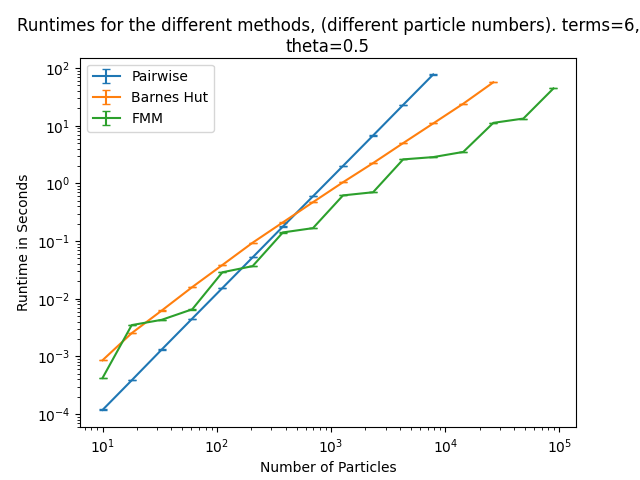

In [6]:
FILE_PATH = 'data/general.npz'
fig = plots.general(FILE_PATH)

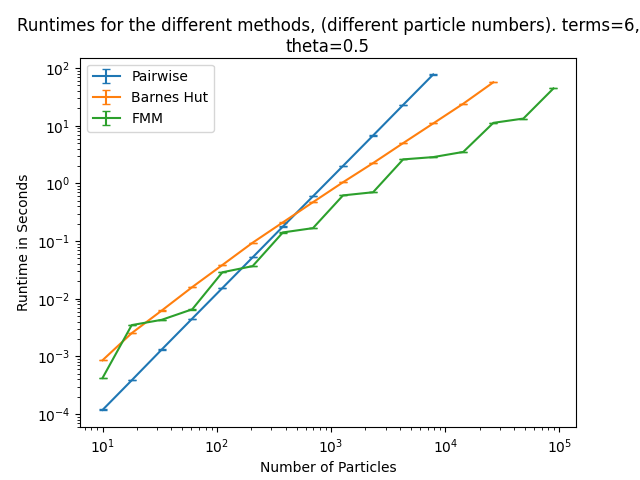

In [7]:
fig, ax = plt.subplots()

ax.errorbar(particle_numbers[:len(pair_averages)], pair_averages, pair_stdevs, capsize=3, label='Pairwise')
ax.errorbar(particle_numbers[:len(bh_averages)],   bh_averages,   bh_stdevs,   capsize=3, label='Barnes Hut')
ax.errorbar(particle_numbers[:len(fmm_averages)],  fmm_averages,  fmm_stdevs,  capsize=3, label='FMM')

# ax.plot(particle_numbers, particle_numbers*10**-3.7)

ax.set_title(f'Runtimes for the different methods, (different particle numbers). terms={terms}, theta={theta}', wrap=True)

# ax.set_aspect('equal')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Number of Particles')
ax.set_ylabel('Runtime in Seconds')
ax.legend();